# Data World Xcrap 🌍

### Python Data Scraping IMDb Movie site using BeautifulSoup

Data Scraping and Data Wrangling using Python BeautifulSoup

### Data Scraping the TOP 100 most popular videos in IMDb in 2020

**Data Scraping** from a website is one of the way to get **valuable data** about present trends especially because most of the data in this age really comes from the datas coming from different website especially Youtube, Facebook, Twitter and other Social Media sites.
Now, if one wants to analyze what's the trend movie currently and use that data for personal or business reasons, scraping data from the popular movie website like **IMDb** is the way to go.

### Data Scraping using PYTHON

We use **Python** because it is one of the most used languages in data science and also because it is the language that I am most **familiar** with.

### Install Important Packages

(If you're already done in this part, just skip this)

### On Windows

**Note:** Make sure that you already installed the Python before pip-installing the following packages.

Open Command Prompt or cmd
Type the following:

```
pip install lxml
pip install numpy
pip install pandas
pip install bs4
pip install requests
```

### On Linux

**Note:** Make sure that you already installed the Python before aptget-installing the following packages.

Open the Terminal
Type the following:

```
apt-get install lxml
apt-get install numpy
apt-get install pandas
apt-get install bs4
apt-get install requests
```

### Going to IMDb Website

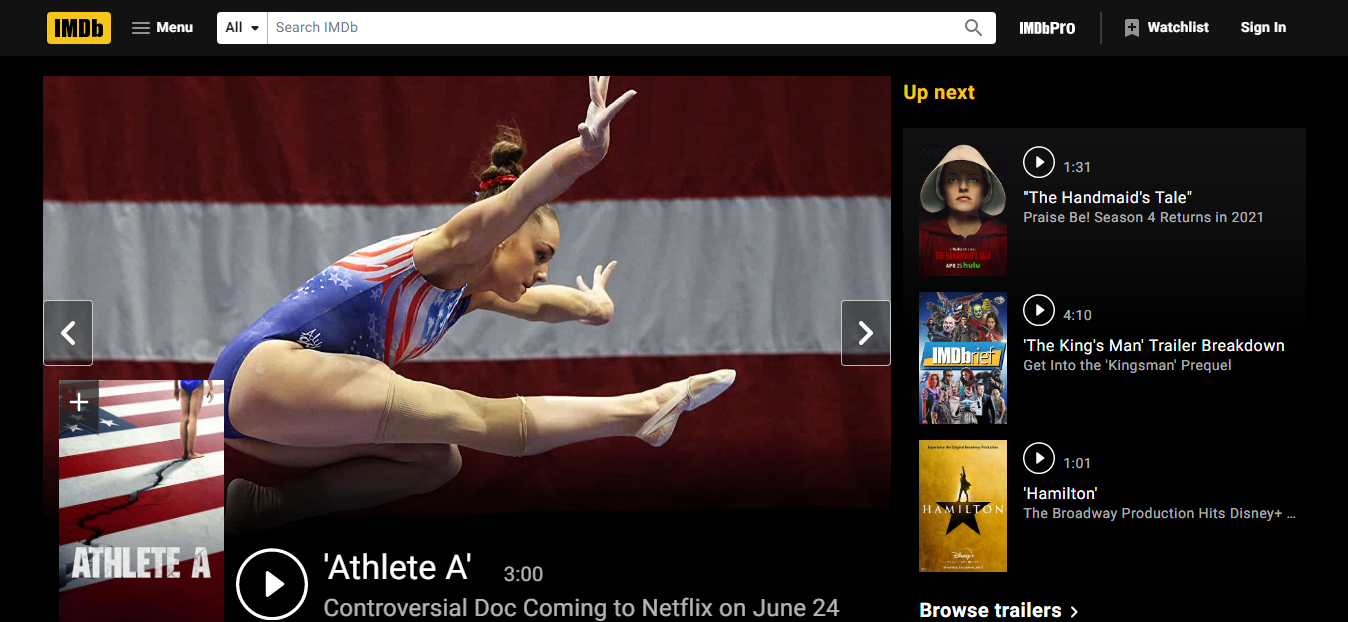

1. Go to IMDb movie website
2. Hover your mouse to the Watchlist
3. Click the Popular Movies section

### Use Google Chrome Developer Tools

1. Use Google Chrome Developer Tools to inspect elements or the data of the website.

2. Right Click mouse then Inspect

3. Find the Elements that correspond to the data we're getting

Keep in mind that one need to find the source of the data before getting it. In the case of the IMDb movie website, the structure of the data of the 1st movie is similar to the structure of those remaining 99 movies. We can take advantage of that later.

**Take note of the TAGS as well as the Attributes like class, id, etc. We'll use that later.**

# Step-by-Step python code

In [ ]:
#Import modules

import pandas as pd
import numpy as np
import re
import lxml

from bs4 import BeautifulSoup
from requests import get
%matplotlib inline

In [ ]:
#Get the page link

url= "https://www.imdb.com/search/title?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2"

**Get page data**
- Get page using requests.get
- Parse page using BeautifulSoup and lxml

In [ ]:
page = get(url)
soup = BeautifulSoup(page.content, 'lxml') 

In [ ]:
#Get the Element or tag that holds the movie contents

content = soup.find(id="main")

**Get Article Title**

soup.find("h1", class_="header")** finds the first line that has h1 tag and has a class header.
.text** gets the text of that line or that element.
.replace("\n","")** just erases \n.

In [ ]:
articleTitle = soup.find("h1", class_="header").text.replace("\n","")

**Get the contents of one movie content**

Find_all returns a list of all instances that has the tags specified (i.e. "div", "class")
To get the first movie only, use movieFrame[0]

In [ ]:
movieFrame = content.find_all("div", class_="lister-item mode-advanced")

**Getting the Movie Title and Movie Date**

We need to first get the line where the title and the date contains because the tags that holds those values are too **common** and using find might not get it to **appear**.

**.find("a")** returns the first line that has a **tag "a"**
**.find_all("span")** returns all lines that has a tag of **"span"**.

Because we only want the date, we only return the second line denoted by **("span")[-1].text** returns the **text value** of that line.

In [ ]:
movieFirstLine = movieFrame[0].find("h3", class_="lister-item-header")
movieTitle = movieFirstLine.find("a").text
movieDate = re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text)

**Getting the Runtime, genre, rating, score and movie description**

Find the other datas are just the same as what we did with the first ones. Just take note that **be more specific** in describing the **attributes** (i.e. class, id, etc.) so that the it will directly return the line that we want to get.

In [ ]:
movieRunTime = movieFrame[0].find("span", class_="runtime").text[:-4]
movieGenre = movieFrame[0].find("span", class_="genre").text.rstrip().replace("\n","").split(",")
movieRating = movieFrame[0].find("strong").text
movieScore = movieFrame[0].find("span", class_="metascore unfavorable").text.rstrip()
movieDesc = movieFrame[0].find_all("p", class_="text-muted")[-1].text.lstrip()

**Getting the movie casts and directors**

Movies w/o including the directors are troublesome and we need to anticipate that by making that missing value into NaN using np.nan. Getting the movie casts is a bit tricky because there is an indefinite number of casts that can be included in each movie, sometimes none, sometimes a few. That is the reason why we need to anticipate those three scenarios.
Take a look at the **code:**

In [ ]:
#Movie Director and Movie Stars
try:
    casts = movieCast.text.replace("\n","").split('|')
    casts = [x.strip() for x in casts]
    casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    movieDirector = casts[0]
    movieStars = [x.strip() for x in casts[1].split(",")]
except:
    casts = movieCast.text.replace("\n","").strip()
    movieDirector = np.nan
    movieStars = [x.strip() for x in casts.split(",")]

**Same scenario with the votes and gross**

We can get an attribute by including it to the attrs dictionary and adding its value to it.

In [ ]:
movieNumbers = movieFrame[0].find_all("span", attrs={"name": "nv"})
if len(movieNumbers) == 2:
    movieVotes = movieNumbers[0].text
    movieGross = movieNumbers[1].text
else:
    movieVotes = movieNumbers[0].text
    movieGross = np.nan

# Full code

In [ ]:
'''
Author: Reljod T. Oreta PUP-Manila
BSECE 5th year
'''
import lxml
import re
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from requests import get

url1 = "https://www.imdb.com/search/title?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2"

class IMDB(object):
	"""docstring for IMDB"""
	def __init__(self, url):
		super(IMDB, self).__init__()
		page = get(url)

		self.soup = BeautifulSoup(page.content, 'lxml')

	def articleTitle(self):
		return self.soup.find("h1", class_="header").text.replace("\n","")

	def bodyContent(self):
		content = self.soup.find(id="main")
		return content.find_all("div", class_="lister-item mode-advanced")

	def movieData(self):
		movieFrame = self.bodyContent()
		movieTitle = []
		movieDate = []
		movieRunTime = []
		movieGenre = []
		movieRating = []
		movieScore = []
		movieDescription = []
		movieDirector = []
		movieStars = []
		movieVotes = []
		movieGross = []
		for movie in movieFrame:
			movieFirstLine = movie.find("h3", class_="lister-item-header")
			movieTitle.append(movieFirstLine.find("a").text)
			movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))
			try:
				movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
			except:
				movieRunTime.append(np.nan)
			movieGenre.append(movie.find("span", class_="genre").text.rstrip().replace("\n","").split(","))
			try:
				movieRating.append(movie.find("strong").text)
			except:
				movieRating.append(np.nan)
			try:
				movieScore.append(movie.find("span", class_="metascore unfavorable").text.rstrip())
			except:
				movieScore.append(np.nan)
			movieDescription.append(movie.find_all("p", class_="text-muted")[-1].text.lstrip())
			movieCast = movie.find("p", class_="")

			try:
				casts = movieCast.text.replace("\n","").split('|')
				casts = [x.strip() for x in casts]
				casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
				movieDirector.append(casts[0])
				movieStars.append([x.strip() for x in casts[1].split(",")])
			except:
				casts = movieCast.text.replace("\n","").strip()
				movieDirector.append(np.nan)
				movieStars.append([x.strip() for x in casts.split(",")])

			movieNumbers = movie.find_all("span", attrs={"name": "nv"})

			if len(movieNumbers) == 2:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(movieNumbers[1].text)
			elif len(movieNumbers) == 1:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(np.nan)
			else:
				movieVotes.append(np.nan)
				movieGross.append(np.nan)

		movieData = [movieTitle, movieDate, movieRunTime, movieGenre, movieRating, movieScore, movieDescription,
							movieDirector, movieStars, movieVotes, movieGross]
		return movieData

# Check the result using the IMDB class

In [ ]:
id1 = IMDB(url1)
#Get Article Title
print(id1.articleTitle())
#Get the first 5 movie data using for loop
for i in range(5):
	print(movieData[i][:5])

# What's next?

The data we extracted from the website should be cleaned first before using it for data analyzation or machine learning but it will be done on my next project using exactly the data that we've been extracted so far.

**Use url:** https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&view=advanced

https://www.imdb.com/chart/top/?ref_=nv_mv_250

https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm

